## Retail Case Study

### Importing Data Files And Libraries

In [101]:
import pandas as pd
import numpy as np

In [102]:
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
customer = pd.read_csv('Customer.csv')
customer.head(1)

,customer_Id,DOB,Gender,city_code
0,268408,02-01-1970,M,4.0


In [104]:
prod_cat = pd.read_csv('prod_cat_info.csv')
prod_cat.head(1)

,prod_cat_code,prod_cat,prod_sub_cat_code,prod_subcat
0,1,Clothing,4,Mens


In [105]:
transactions = pd.read_csv('Transactions.csv')
transactions.head(1)

,transaction_id,cust_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type
0,80712190438,270351,28-02-2014,1,1,-5,-772,405.3,-4265.3,e-Shop


### 1. Merge the datasets Customers, Product Hierarchy and Transactions as Customer_Final. Ensure to 
keep all customers who have done transactions with us and select the join type accordingly.

In [125]:
customer_transactions = pd.merge(customer,transactions,left_on = 'customer_Id',right_on='cust_id',how='left')

In [126]:
customer_final = pd.merge(customer_transactions,prod_cat,left_on = ['prod_subcat_code','prod_cat_code'],right_on=['prod_sub_cat_code','prod_cat_code'],how='left')

In [127]:
customer_final = customer_final.loc[:,['customer_Id','DOB','Gender','city_code','transaction_id','tran_date','prod_subcat_code','prod_cat_code','Qty','Rate','Tax','total_amt','Store_type','prod_cat','prod_subcat']]
customer_final.head(1)

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
0,268408,02-01-1970,M,4.0,8.724384e+10,13-01-2014,7.0,5.0,5.0,187.0,98.175,1033.175,TeleShop,Books,Fiction


### 2. Prepare a summary report for the merged data set.

### a.Get the column names and their corresponding data types

In [128]:
customer_final['customer_Id'] = customer_final['customer_Id'].astype('object')
customer_final['city_code'] = customer_final['city_code'].astype('object')
customer_final['transaction_id'] = customer_final['transaction_id'].astype('object')
customer_final['prod_subcat_code'] = customer_final['prod_subcat_code'].astype('object')
customer_final['prod_cat_code'] = customer_final['prod_cat_code'].astype('object')
customer_final['prod_subcat_code'] = customer_final['prod_subcat_code'].astype('object')

In [130]:
customer_final['tran_date'] = pd.to_datetime(customer_final['tran_date'],format='%d/%m/%Y',errors='coerce')

In [137]:
customer_final['DOB'] = pd.to_datetime(customer_final['DOB'],format='%d-%m-%Y')

In [138]:
customer_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23194 entries, 0 to 23193
Data columns (total 15 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_Id       23194 non-null  object        
 1   DOB               23194 non-null  datetime64[ns]
 2   Gender            23185 non-null  object        
 3   city_code         23186 non-null  object        
 4   transaction_id    23053 non-null  object        
 5   tran_date         9124 non-null   datetime64[ns]
 6   prod_subcat_code  23053 non-null  object        
 7   prod_cat_code     23053 non-null  object        
 8   Qty               23053 non-null  float64       
 9   Rate              23053 non-null  float64       
 10  Tax               23053 non-null  float64       
 11  total_amt         23053 non-null  float64       
 12  Store_type        23053 non-null  object        
 13  prod_cat          23053 non-null  object        
 14  prod_subcat       2305

### b. Top/Bottom 10 observations

In [11]:
customer_final.sort_values(by = 'total_amt',ascending = False).head(10) #Top 10 Observation

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
4065,270667,24-02-1974,M,9.0,47747209902.0,23-08-2012,5.0,3.0,5.0,1500.0,787.500,8287.500,MBR,Electronics,Computers
1900,271944,11-12-1971,F,5.0,94956713072.0,23-03-2013,4.0,2.0,5.0,1500.0,787.500,8287.500,e-Shop,Footwear,Kids
8202,274854,07-02-1978,M,1.0,96892547017.0,21-06-2011,3.0,2.0,5.0,1500.0,787.500,8287.500,e-Shop,Footwear,Women
10602,272954,05-06-1980,F,3.0,53187031441.0,26-05-2012,2.0,6.0,5.0,1500.0,787.500,8287.500,TeleShop,Home and kitchen,Furnishing
9504,271152,12-06-1979,M,8.0,58989623800.0,1/10/2011,5.0,3.0,5.0,1499.0,786.975,8281.975,e-Shop,Electronics,Computers
7375,273076,28-04-1977,F,5.0,35447491388.0,24-09-2013,10.0,3.0,5.0,1499.0,786.975,8281.975,MBR,Electronics,Audio and video
13420,270087,08-04-1983,F,5.0,82213567288.0,4/1/2014,11.0,6.0,5.0,1499.0,786.975,8281.975,e-Shop,Home and kitchen,Bath
19908,271635,06-09-1989,F,1.0,12081555316.0,21-08-2012,3.0,5.0,5.0,1499.0,786.975,8281.975,TeleShop,Books,Comics
21713,274055,18-07-1991,M,6.0,11065779960.0,19-07-2011,4.0,4.0,5.0,1499.0,786.975,8281.975,MBR,Bags,Women
3973,270121,29-01-1974,F,5.0,97311373122.0,29-11-2011,10.0,3.0,5.0,1498.0,786.450,8276.450,TeleShop,Electronics,Audio and video


In [12]:
customer_final.sort_values(by = 'total_amt',ascending = True).head(10) #Bottom 10 Observation

,customer_Id,DOB,Gender,city_code,transaction_id,tran_date,prod_subcat_code,prod_cat_code,Qty,Rate,Tax,total_amt,Store_type,prod_cat,prod_subcat
3286,270384,11-05-1973,F,8.0,29258453508.0,27-02-2014,5.0,3.0,-5.0,-1497.0,785.925,-8270.925,e-Shop,Electronics,Computers
3686,269010,14-10-1973,F,2.0,18666557088.0,7/4/2013,4.0,2.0,-5.0,-1477.0,775.425,-8160.425,e-Shop,Footwear,Kids
2788,267583,21-11-1972,M,4.0,4572080426.0,8/12/2013,1.0,1.0,-5.0,-1476.0,774.900,-8154.900,Flagship store,Clothing,Women
4417,266957,22-06-1974,M,3.0,71900965128.0,17-05-2013,4.0,1.0,-5.0,-1474.0,773.850,-8143.850,Flagship store,Clothing,Mens
12281,270571,26-02-1982,F,1.0,19309959579.0,10/10/2013,7.0,5.0,-5.0,-1473.0,773.325,-8138.325,e-Shop,Books,Fiction
18724,268669,07-08-1988,F,6.0,12711236844.0,5/12/2013,11.0,6.0,-5.0,-1472.0,772.800,-8132.800,e-Shop,Home and kitchen,Bath
14580,267898,14-07-1984,M,10.0,15103708771.0,10/7/2013,4.0,1.0,-5.0,-1472.0,772.800,-8132.800,TeleShop,Clothing,Mens
14318,269514,26-04-1984,M,9.0,64649255875.0,16-05-2011,9.0,3.0,-5.0,-1470.0,771.750,-8121.750,e-Shop,Electronics,Cameras
18707,272871,02-08-1988,F,8.0,80262862720.0,22-07-2013,12.0,6.0,-5.0,-1468.0,770.700,-8110.700,Flagship store,Home and kitchen,Tools
18706,272871,02-08-1988,F,8.0,80262862720.0,23-07-2013,12.0,6.0,-5.0,-1468.0,770.700,-8110.700,Flagship store,Home and kitchen,Tools


###  c. “Five-number summary” for continuous variables (min, Q1, median, Q3 and max)

In [13]:
Five_number_summary = customer_final.loc[:,['Qty','Rate','Tax','total_amt']].describe(include = 'all').T

In [14]:
Five_number_summary = Five_number_summary.iloc[:,3:8]

In [15]:
Five_number_summary = Five_number_summary.rename(columns = {'50%':'median'})

In [16]:
Five_number_summary

,min,25%,median,75%,max
Qty,-5.000,1.00,3.00,4.000,5.0
Rate,-1499.000,312.00,710.00,1109.000,1500.0
Tax,7.350,98.28,199.08,365.715,787.5
total_amt,-8270.925,762.45,1754.74,3569.150,8287.5


### d. Frequency tables for all the categorical variables

In [17]:
Frequency_table = customer_final.select_dtypes(include=['object']).describe(include = 'all').T

In [18]:
Frequency_table = Frequency_table.iloc[:,3:]

In [19]:
Frequency_table

,freq
customer_Id,13
DOB,32
Gender,11877
city_code,2435.0
transaction_id,4.0
tran_date,35
prod_subcat_code,4002.0
prod_cat_code,6069.0
Store_type,9311
prod_cat,6069


### 3. Generate histograms for all continuous variables and frequency bars for categorical variables.

In [20]:
#continuous_variables
continuous_variables = customer_final.select_dtypes(include=['float64'])

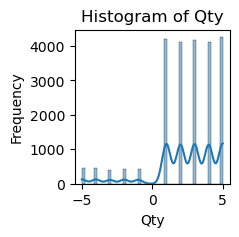

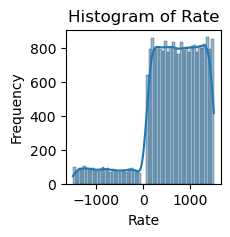

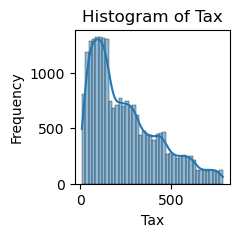

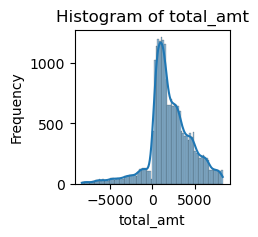

In [21]:
for column in continuous_variables.columns:
    plt.figure(figsize=(2,2))
    sns.histplot(data=customer_final, x=column, kde=True)
    plt.title(f'Histogram of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.show()

In [22]:
#categorical_columns
categorical_columns = customer_final.select_dtypes(include=['object'])

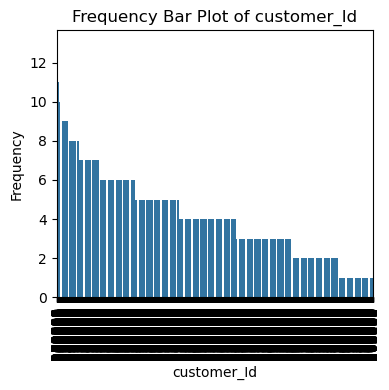

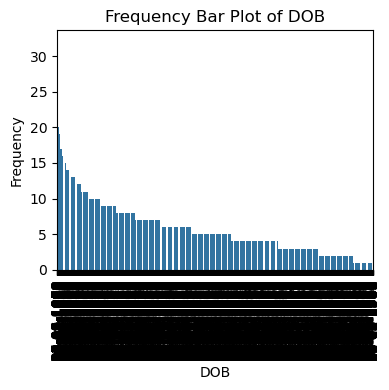

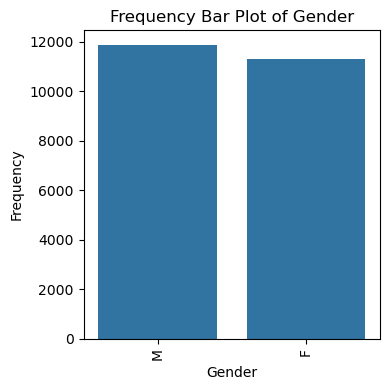

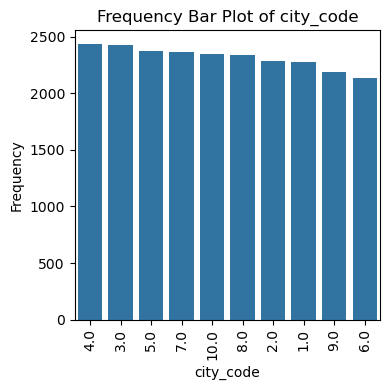

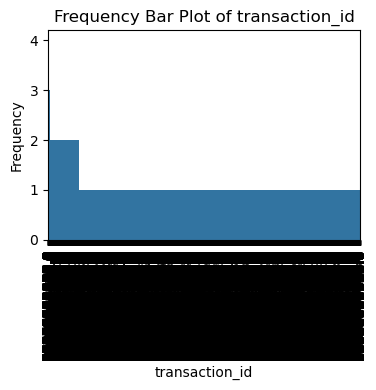

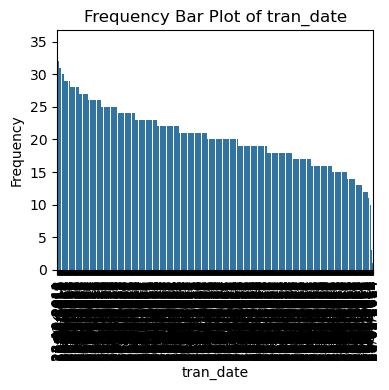

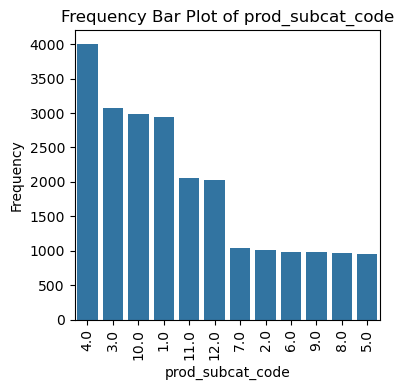

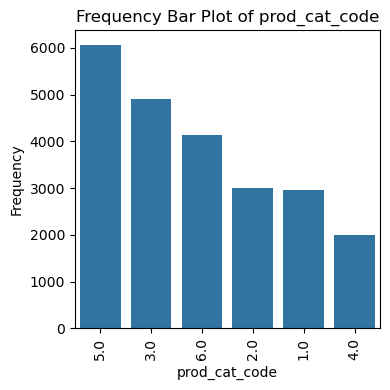

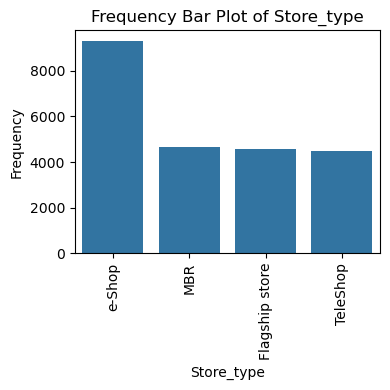

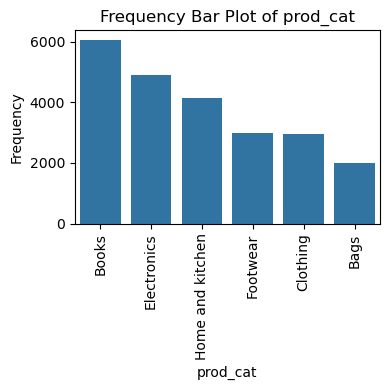

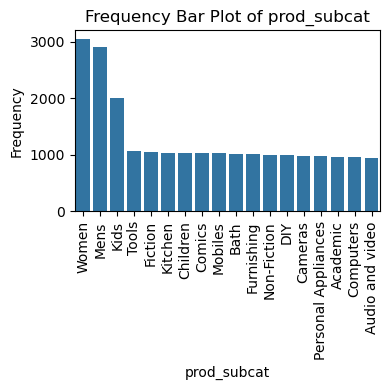

In [23]:
for column in categorical_columns.columns:
    plt.figure(figsize=(4,4))
    sns.countplot(data=customer_final, x=column, order=customer_final[column].value_counts().index)
    plt.title(f'Frequency Bar Plot of {column}')
    plt.xlabel(column)
    plt.ylabel('Frequency')
    plt.xticks(rotation=90)
    plt.tight_layout()
    plt.show()

## 4. Calculate the following information using the merged dataset :

### a. Time period of the available transaction data

In [38]:
min_date = customer_final.tran_date.min()
max_date = customer_final.tran_date.max()

In [42]:
time_period = (max_date - min_date)

In [43]:
time_period

Timedelta('1107 days 00:00:00')

### b. Count of transactions where the total amount of transaction was negative

In [50]:
Count_of_negative_transactions = customer_final[customer_final.total_amt < 0].shape[0]

In [51]:
Count_of_negative_transactions

2177

## 5. Analyze which product categories are more popular among females vs male customers.

In [110]:
category_popularity = pd.pivot_table(data = customer_final,index = 'prod_cat',columns = 'Gender',values = 'total_amt',aggfunc = 'count')
category_popularity

Gender,F,M
prod_cat,,
Bags,994,1004
Books,2949,3116
Clothing,1439,1518
Electronics,2328,2570
Footwear,1529,1469
Home and kitchen,1994,2134


In [93]:
catergory_popular_among_males = category_popularity.iloc[:,1:].sort_values(by = 'M',ascending = False).head(1)
catergory_popular_among_males

Gender,M
prod_cat,
Books,3116


In [109]:
catergory_popular_among_females = category_popularity.iloc[:,0:1].sort_values(by = 'F',ascending = False).head(1)
catergory_popular_among_females

Gender,F
prod_cat,
Books,2949


### 6. Which City code has the maximum customers and what was the percentage of customers from 
that city?

In [12]:
total_customer = customer_final.customer_Id.shape[0]
total_customer

23194

In [13]:
customer_count_city_wise = customer_final.groupby('city_code').city_code.value_counts()
max_customers_by_city_code = customer_count_city_wise.sort_values(ascending = False).head(1)
max_customers_by_city_code

city_code
4.0    2435
Name: count, dtype: int64

In [14]:
percentage_of_customers_from_that_city = max_customers_by_city_code*100/total_customer
percentage_of_customers_from_that_city

city_code
4.0    10.498405
Name: count, dtype: float64

## 7. Which store type sells the maximum products by value and by quantity?

In [25]:
#store type sells the maximum products by value
store_wise_value = customer_final.groupby('Store_type').total_amt.sum()
max_store_wise_value = store_wise_value.sort_values(ascending = False).head(1)
max_store_wise_value

Store_type
e-Shop    19824816.05
Name: total_amt, dtype: float64

In [28]:
#store type sells the maximum products by quantity
store_wise_Qty = customer_final.groupby('Store_type').Qty.sum()
max_store_wise_Qty = store_wise_Qty.sort_values(ascending = False).head(1)
max_store_wise_Qty

Store_type
e-Shop    22763.0
Name: Qty, dtype: float64

## 8. What was the total amount earned from the "Electronics" and "Clothing" categories from 
Flagship Stores

In [49]:
df = customer_final[(customer_final.prod_cat == 'Electronics') | (customer_final.prod_cat == 'Clothing')]
df = df[df.Store_type == 'Flagship store']
df.groupby('prod_cat').total_amt.sum()

prod_cat
Clothing       1194423.23
Electronics    2215136.04
Name: total_amt, dtype: float64

## 9. What was the total amount earned from "Male" customers under the "Electronics" category?

In [55]:
df1 = customer_final[(customer_final.prod_cat == 'Electronics') & (customer_final.Gender == 'M')]
df1.groupby(['Gender','prod_cat']).total_amt.sum()

Gender  prod_cat   
M       Electronics    5703109.425
Name: total_amt, dtype: float64

## 10. How many customers have more than 10 unique transactions, after removing all transactions 
which have any negative amounts?

In [78]:
df2 = customer_final[customer_final.total_amt > 0]
df2 = df2.groupby('customer_Id').transaction_id.nunique()
df2 = df2.reset_index()
df2 = df2[df2.transaction_id > 10]
df2 = df2.iloc[:,0:1].count()
df2

customer_Id    6
dtype: int64

## 11. For all customers aged between 25 - 35, find out:

In [145]:
customer_final['Age'] = 2024 - customer_final['DOB'].dt.year
df4 = customer_final[(customer_final.Age >= 25 ) & (customer_final.Age <= 35 )]

### a. What was the total amount spent for “Electronics” and “Books” product categories?

In [155]:
df5 = df4[(df4.prod_cat == 'Electronics') | (df4.prod_cat == 'Books')]
df5 = df5.groupby('prod_cat').total_amt.sum()
df5

prod_cat
Books          2109168.750
Electronics    1819301.835
Name: total_amt, dtype: float64

### b. What was the total amount spent by these customers between 1st Jan, 2014 to 1st Mar, 2014?

In [161]:
df6 = df4[(df4.tran_date >= '2014-01-01') & (df4.tran_date <= '2014-03-01')]

In [165]:
total_amt_spent = df6.total_amt.sum()
total_amt_spent

197188.35499999998